In [101]:
import json 
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns 
import pickle
import h5py

import matplotlib.pyplot as plt
import pandas as pd

text_path = "/Users/leosheng/Desktop/BERT_text_features/bert-output.jsonl"
gt_path = "/Users/leosheng/Desktop/BERT_text_features/sarcasm_data.json"
audio_path = "/Users/leosheng/Desktop/BERT_text_features/audio_features.p"
video_path = "/Users/leosheng/Desktop/BERT_text_features/resnet_pool5.hdf5"

In [63]:
with open(text_path, "r") as json_file:
    json_list = list(json_file)

def get_cls_embed(json_list):
    result = []
    for json_str in json_list:
        r = json.loads(json_str)
        result.append(np.mean([l["values"] for l in r['features'][0]["layers"]], axis = 0))
    return np.array(result)

text_features = get_cls_embed(json_list) # shape (690, 768)

In [59]:
def get_gt_label(gt_path):
    
    result = []
    ids = []
    with open(gt_path, "r") as js:
        gt = json.load(js)
    for id, body in gt.items():
        ids.append(id)
        result.append(body["sarcasm"])
    return ids, result

ids, gt_label = get_gt_label(gt_path)

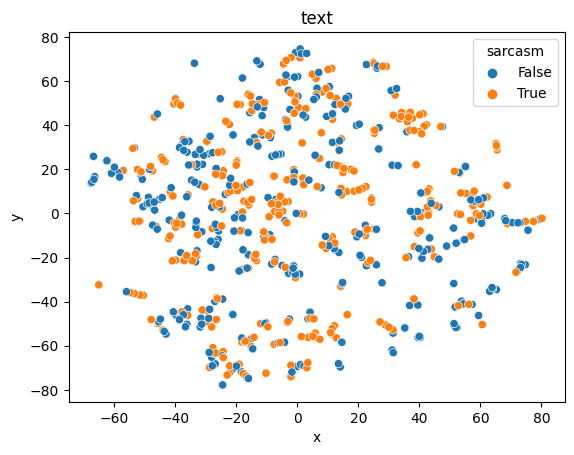

In [64]:
def plot_TSNE(modaliy_name, features, labels):
    '''
    plot the tsne embedded2 dimension with features and gt_label
    features: (N,dim)
    labels:  (N, 1)
    '''
    embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(features)
    figure = plt.figure()
    data = pd.DataFrame({"x":embedded[:,0], "y": embedded[:,1], "sarcasm": labels})
    
    sns.scatterplot(data=data, x="x", y="y", hue="sarcasm")
    plt.title(modaliy_name)

plot_TSNE("text", text_features, gt_label)

In [95]:
def get_audio_feature(ids, audio_path):

    with open(audio_path, 'rb') as f:
        audio_data = pickle.load(f, encoding='latin1') 
    result = []
    for id in ids: 
        # result.append(audio_data[id].flatten())
        result.append(np.mean(audio_data[id], axis=1))
    return np.stack(result)

audio_feature = get_audio_feature(ids, audio_path)


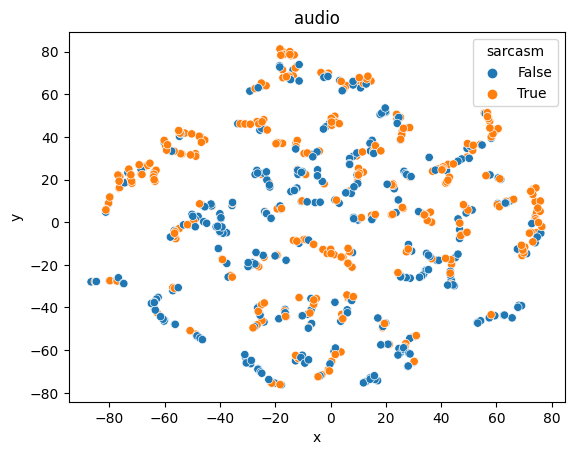

In [96]:
plot_TSNE("audio", audio_feature, gt_label)

In [107]:
def get_video_feature(ids, video_path):
    video_features = h5py.File(video_path)
    result = []
    for id in ids:
        result.append(np.mean(video_features[id][()], axis=0))
    return np.stack(result)

In [109]:
video_feature = get_video_feature(ids, video_path)

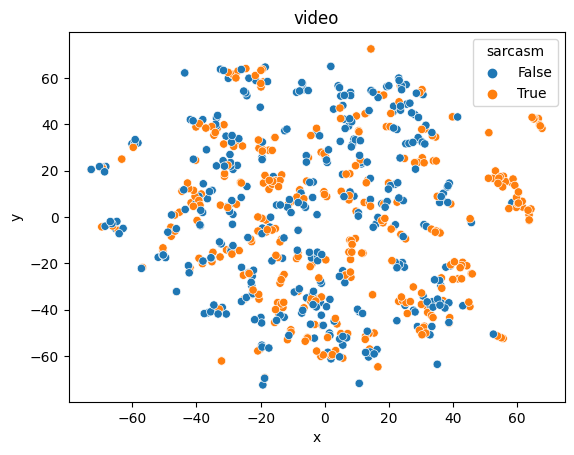

In [111]:
plot_TSNE("video", video_feature, gt_label)

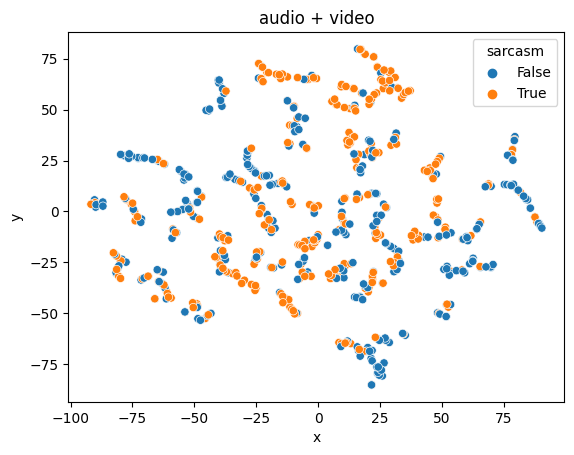

In [118]:
plot_TSNE("audio + video", np.concatenate((audio_feature, video_feature), axis = 1), gt_label)

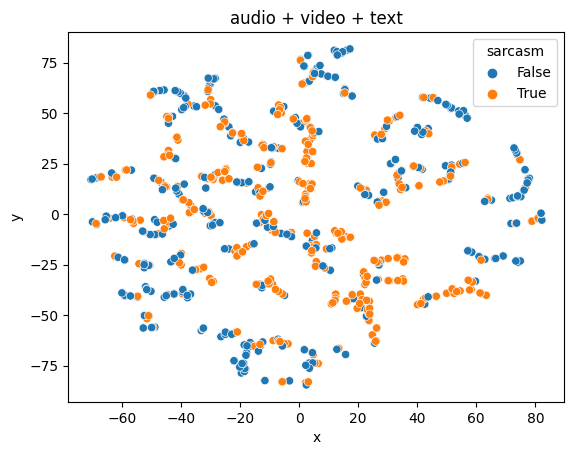

In [119]:
plot_TSNE("audio + video + text", np.concatenate((audio_feature, video_feature, text_features), axis = 1), gt_label)

In [ ]:
def PCA_eval():
    